# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities? 
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
df = pd.read_csv('cars_hw.csv')
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


       Unnamed: 0    Make_Year   Mileage_Run  Seating_Capacity         Price
count  976.000000   976.000000    976.000000        976.000000  9.760000e+02
mean   488.500000  2016.963115  41571.195697          5.095287  7.410195e+05
std    281.891232     2.818742  24390.995134          0.446224  3.673234e+05
min      1.000000  2011.000000   1117.000000          4.000000  1.880000e+05
25%    244.750000  2015.000000  22676.750000          5.000000  4.757500e+05
50%    488.500000  2017.000000  37570.500000          5.000000  6.665000e+05
75%    732.250000  2019.000000  57421.250000          5.000000  8.830000e+05
max    976.000000  2022.000000  99495.000000          8.000000  2.941000e+06


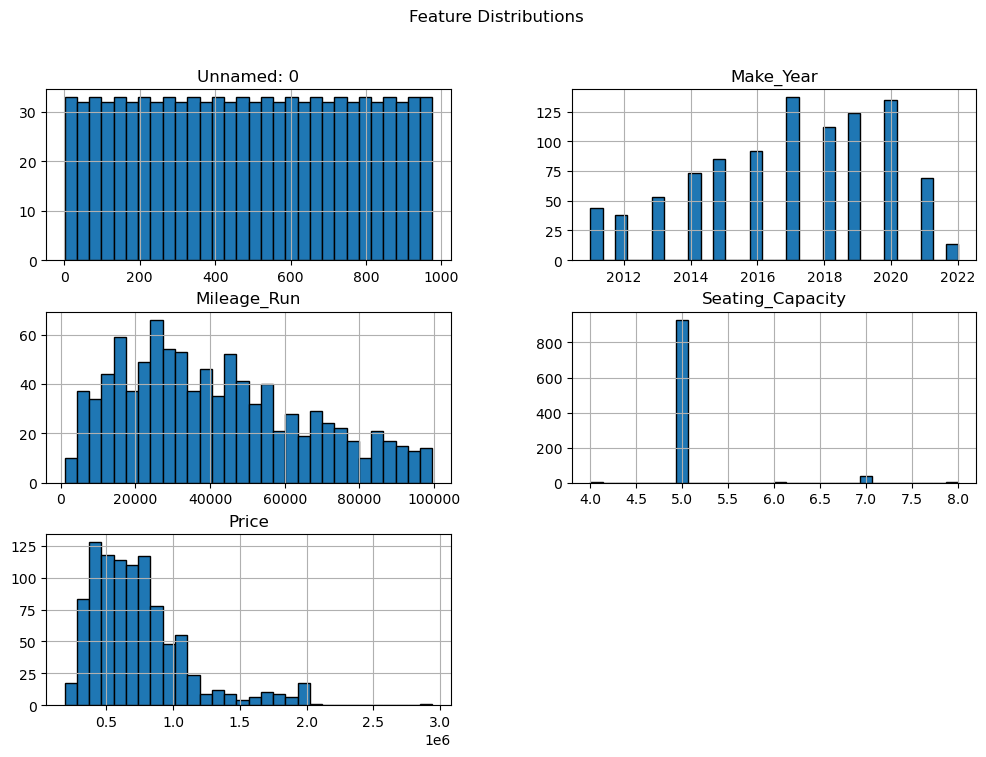

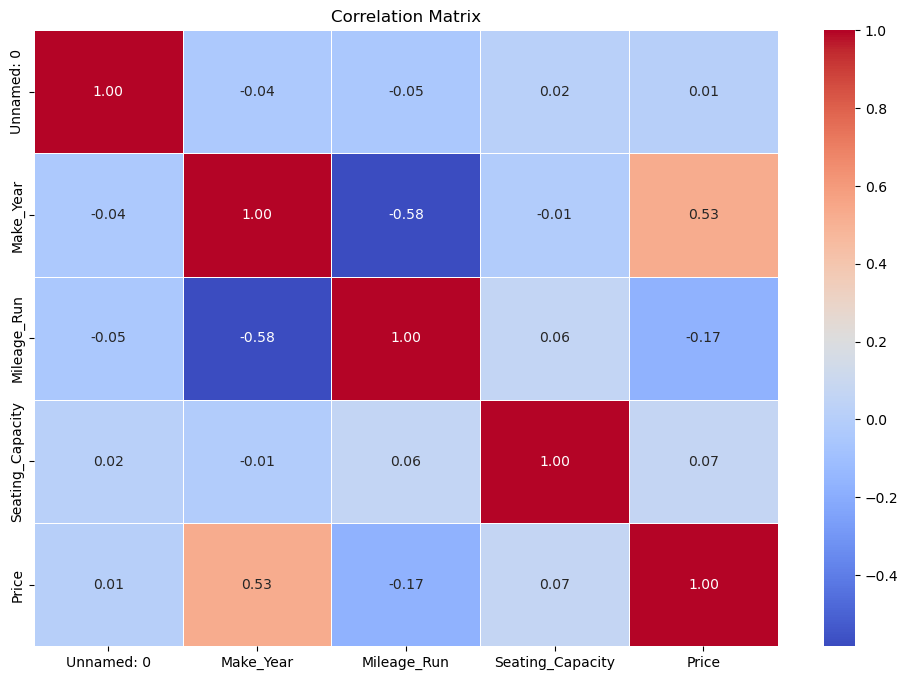

In [30]:
#EDA
df['Make_Year'] = df['Make_Year'].astype(int)
print(df.describe())

df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [31]:
#one-hot encode categorical variables
categorical_cols = ['Make', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [32]:
#define features/target variable
X = df.drop(columns=['Price'])
y = df['Price']

#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#train test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

ValueError: could not convert string to float: '1st'

In [33]:
#train simple linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#evaluate performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Train R^2: {train_r2:.2f}, Test R^2: {test_r2:.2f}")

Train RMSE: 142154.19, Test RMSE: 143815.30
Train R^2: 0.86, Test R^2: 0.82


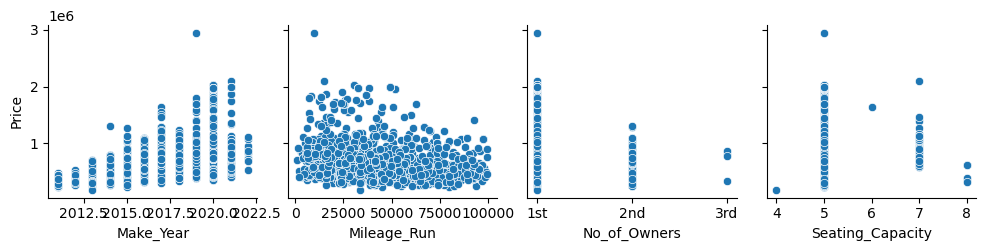

In [34]:
#partial correlation plots
sns.pairplot(df, y_vars=['Price'], x_vars=['Make_Year', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity'])
plt.show()

In [35]:
#polynomial features for interactions
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#train complex linear regression model
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_train_poly_pred = lr_poly.predict(X_train_poly)
y_test_poly_pred = lr_poly.predict(X_test_poly)

#evaluate performance
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_poly_pred))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_poly_pred))
train_r2_poly = r2_score(y_train, y_train_poly_pred)
test_r2_poly = r2_score(y_test, y_test_poly_pred)

In [36]:
#compare
print(f"Polynomial Model Train RMSE: {train_rmse_poly:.2f}, Test RMSE: {test_rmse_poly:.2f}")
print(f"Polynomial Model Train R^2: {train_r2_poly:.2f}, Test R^2: {test_r2_poly:.2f}")
print(f"Linear Model Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
print(f"Linear Model Train R^2: {train_r2:.2f}, Test R^2: {test_r2:.2f}")
#honestly not entirely sure what went wrong here...

Polynomial Model Train RMSE: 76282.95, Test RMSE: 2060834439185518336.00
Polynomial Model Train R^2: 0.96, Test R^2: -37028821798378407741882368.00
Linear Model Train RMSE: 142154.19, Test RMSE: 143815.30
Linear Model Train R^2: 0.86, Test R^2: 0.82
